![Machine Learning Lab](banner.jpg)


# Laboratorio 3 Actividad


## Instrucciones generales


1. Esta actividad debe ser entregada por BN y es de carácter individual. No se permite entregar el laboratorio después de la fecha establecida.
2. Al responder las preguntas de las actividades por favor marcar las respuestas con la sección a la que corresponden, por ejemplo: `## Exploración de datos 2.1`. Es preferible que esto lo hagan con secciones de MarkDown.
3. Por favor nombrar el archivo de acuerdo al siguiente formato `{email}_lab3.ipynb`.
4. Si tienen alguna duda pueden escribirme a mi correo `j.rayom@uniandes.edu.co` o contactarme directamente por Teams

Para este laboratorio deben usar el siguiente dataset: `https://www.kaggle.com/datasets/vishardmehta/heart-risk-progression-dataset`

### Objetivos

1. Comprender la estructura y características del dataset mediante la exploración y visualización de datos para identificar patrones relevantes en la predicción en riesgo de ataques al corazón.

2. Aplicar técnicas de preprocesamiento y modelado utilizando StandardScaler, OneHotEncoder y SVC, evaluando el impacto de diferentes kernels en la frontera de decisión.

3. Optimizar el rendimiento del modelo mediante la búsqueda de hiperparámetros con GridSearchCV.


* * *

Instrucciones
-------------

### 0\. Descarga del Dataset

Utiliza el siguiente enlace para descargar el dataset de riesgos cardiovasculares desde Kaggle:

[Descargar Dataset](https://www.kaggle.com/datasets/vishardmehta/heart-risk-progression-dataset)

El dataset contiene pacientes, donde la columna `risk_category` indica el riesgo de padecer enfermedades cardiovasculares (`Low`, `Medium`, `High`)

### 1\. Exploración de datos (10%)

1.  Carga el dataset en un DataFrame de pandas.
2.  Elimina las columnas `heart_disease_risk_score` y `Patient_ID`.
3.  Realiza un pairplot entre las variables usando seaborne

### 2\. Preprocesamiento de Datos (10%)

1.  Separa las características (`X`) de la etiqueta (`Y`). La columna `risk_category` es la etiqueta.
3.  Divide el dataset en conjuntos de entrenamiento y prueba utilizando `train_test_split` de `sklearn`. **Asegúrate de usar `random_state=42` para garantizar la reproducibilidad de los resultados.**

### 3\. Exploración efecto del kernel (20%)

1. Utilice la función `plot_frontier_svc` definidia abajo para graficar la frontera de decisión entre las clases usando solo las columnas `['systolic_bp', 'age']`. Utilice **`LabelEncoder`** para codificar `Y`. Haga la gráfica para todos los kernels disponibles en sklearn.
2. Compare los resultados usando `C = [0.1, 1, 10, 1000]` y `kernel=rbf`. 
3. Responda las siguientes preguntas

- ¿Usando `rbf` que observa sucede a medida que se incrementa `C` con la frontera de decisión?

### 4\. Entrenamiento y Evaluación (30%)

1. Construye un pipeline en `sklearn` que incluya los siguientes componentes: **`StandardScaler`**, **`OneHotEncoder`** y **`SVC`**. Utilice la clase `Pipeline` de sklearn y utilice el kernel `poly` con C=`1.0`
2. Entrena el modelo con el dataset de entrenamiento
3. Producir el reporte completo de clasificación y la matriz de confusión.

### 5\. Optimizacion de parametros (30%)

1. Construye un pipeline en `sklearn` que incluya los siguientes componentes: **`StandardScaler`**, **`OneHotEncoder`** y **`SVC`**. Utilice la clase `Pipeline` de sklearn
2. Entrena el modelo con el dataset de entrenamiento usando GridSearchCV pruebe todos los kernels disponibles en sklearn y utilice `C = [0.1, 1, 10, 100]`
3. Responsa las siguientes preguntas

- ¿Cuales hiperparámetros arrojaron el mejor modelo?


---

In [39]:
import numpy as np
import pandas as pd

from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler, OneHotEncoder
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score, recall_score

import seaborn as sns
from matplotlib import pyplot as plt
from matplotlib.colors import ListedColormap


In [ ]:


def plot_frontier_svc(X_, y_, kernel="linear", C=1):
    """
    Grafica la frontera de decisión de un clasificador de Máquina de Vectores de Soporte (SVM)
    utilizando conjuntos de datos de entrenamiento y prueba.
    El clasificador SVM es entrenado en la versión escalada de la matriz de características.
    La función visualiza la frontera de decisión.

    :param X_: ndarray
        La matriz de características. Estos datos deben contener únicamente 2 características,
        por ejemplo, ['Glucosa', 'Edad']

    :param y_: ndarray
        Los valores objetivo/etiquetas de clase correspondientes a las filas de la matriz
        de características de entrada.

    :param kernel: str, opcional
        Especifica el tipo de kernel a utilizar en el algoritmo SVM. Por defecto es "linear".
        Otras opciones válidas incluyen "rbf", "poly", "sigmoid", etc.

    :param C: float, opcional
        Parámetro de regularización. La fuerza de la regularización es inversamente
        proporcional a C. Valor por defecto es 1.
    """

    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X_)

    X_train_, X_test_, y_train_, y_test_ = train_test_split(X_scaled, y_, test_size=0.2, random_state=31)

    svm = SVC(kernel=kernel, C=C)
    svm.fit(X_train_, y_train_)

    x_min, x_max = X_scaled[:, 0].min() - 1, X_scaled[:, 0].max() + 1
    y_min, y_max = X_scaled[:, 1].min() - 1, X_scaled[:, 1].max() + 1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                         np.linspace(y_min, y_max, 100))

    Z = svm.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, alpha=0.5, cmap=ListedColormap(["#cce5ff", "#ffcccc",  "#d4edda"]))

    train_df = pd.DataFrame({
        'x': X_train_[:, 0],
        'y': X_train_[:, 1],
        'class': y_train_,
        'set': 'train'
    })
    test_df = pd.DataFrame({
        'x': X_test_[:, 0],
        'y': X_test_[:, 1],
        'class': y_test_,
        'set': 'test'
    })
    df = pd.concat([train_df, test_df])

    sns.scatterplot(data=df, x='x', y='y', hue='class', style='set', palette='tab10' )
    plt.xlabel("Componente Principal 1")
    plt.ylabel("Componente Principal 2")
    plt.title(f"Frontera de Decisión del SVM kernel: {kernel} C:{C}")
    plt.legend()
    plt.show()

### 1\. Exploración de datos (10%)

1.  Carga el dataset en un DataFrame de pandas.
2.  Elimina las columnas `heart_disease_risk_score` y `Patient_ID`.
3.  Realiza un pairplot entre las variables usando seaborne

In [17]:
# cargar dataset y eliminar columnas no necesarias
cardiovascular_risk_df = pd.read_csv("datasets/cardiovascular_risk_dataset.csv").drop(columns = ["heart_disease_risk_score", "Patient_ID"])
cardiovascular_risk_df.head()

age   bmi  systolic_bp  diastolic_bp  cholesterol_mg_dl  \
0   62  25.0          142            93                247   
1   54  29.7          158           101                254   
2   46  36.2          170           113                276   
3   48  30.4          153            98                230   
4   46  25.3          139            87                206   

   resting_heart_rate smoking_status  daily_steps  stress_level  \
0                  72          Never        11565             3   
1                  74        Current         4036             8   
2                  80        Current         3043             9   
3                  73         Former         5604             5   
4                  69        Current         7464             1   

   physical_activity_hours_per_week  sleep_hours family_history_heart_disease  \
0                               5.6          8.2                           No   
1                               0.5          6.7                           No   
2                               0.4          4.0                           No   
3                               0.6          8.0                           No   
4                               2.0          6.1                           No   

   diet_quality_score  alcohol_units_per_week risk_category  
0                   7                     0.7        Medium  
1                   5                     4.5          High  
2                   1                    20.8          High  
3                   4                     8.5        Medium  
4                   5                     3.6        Medium

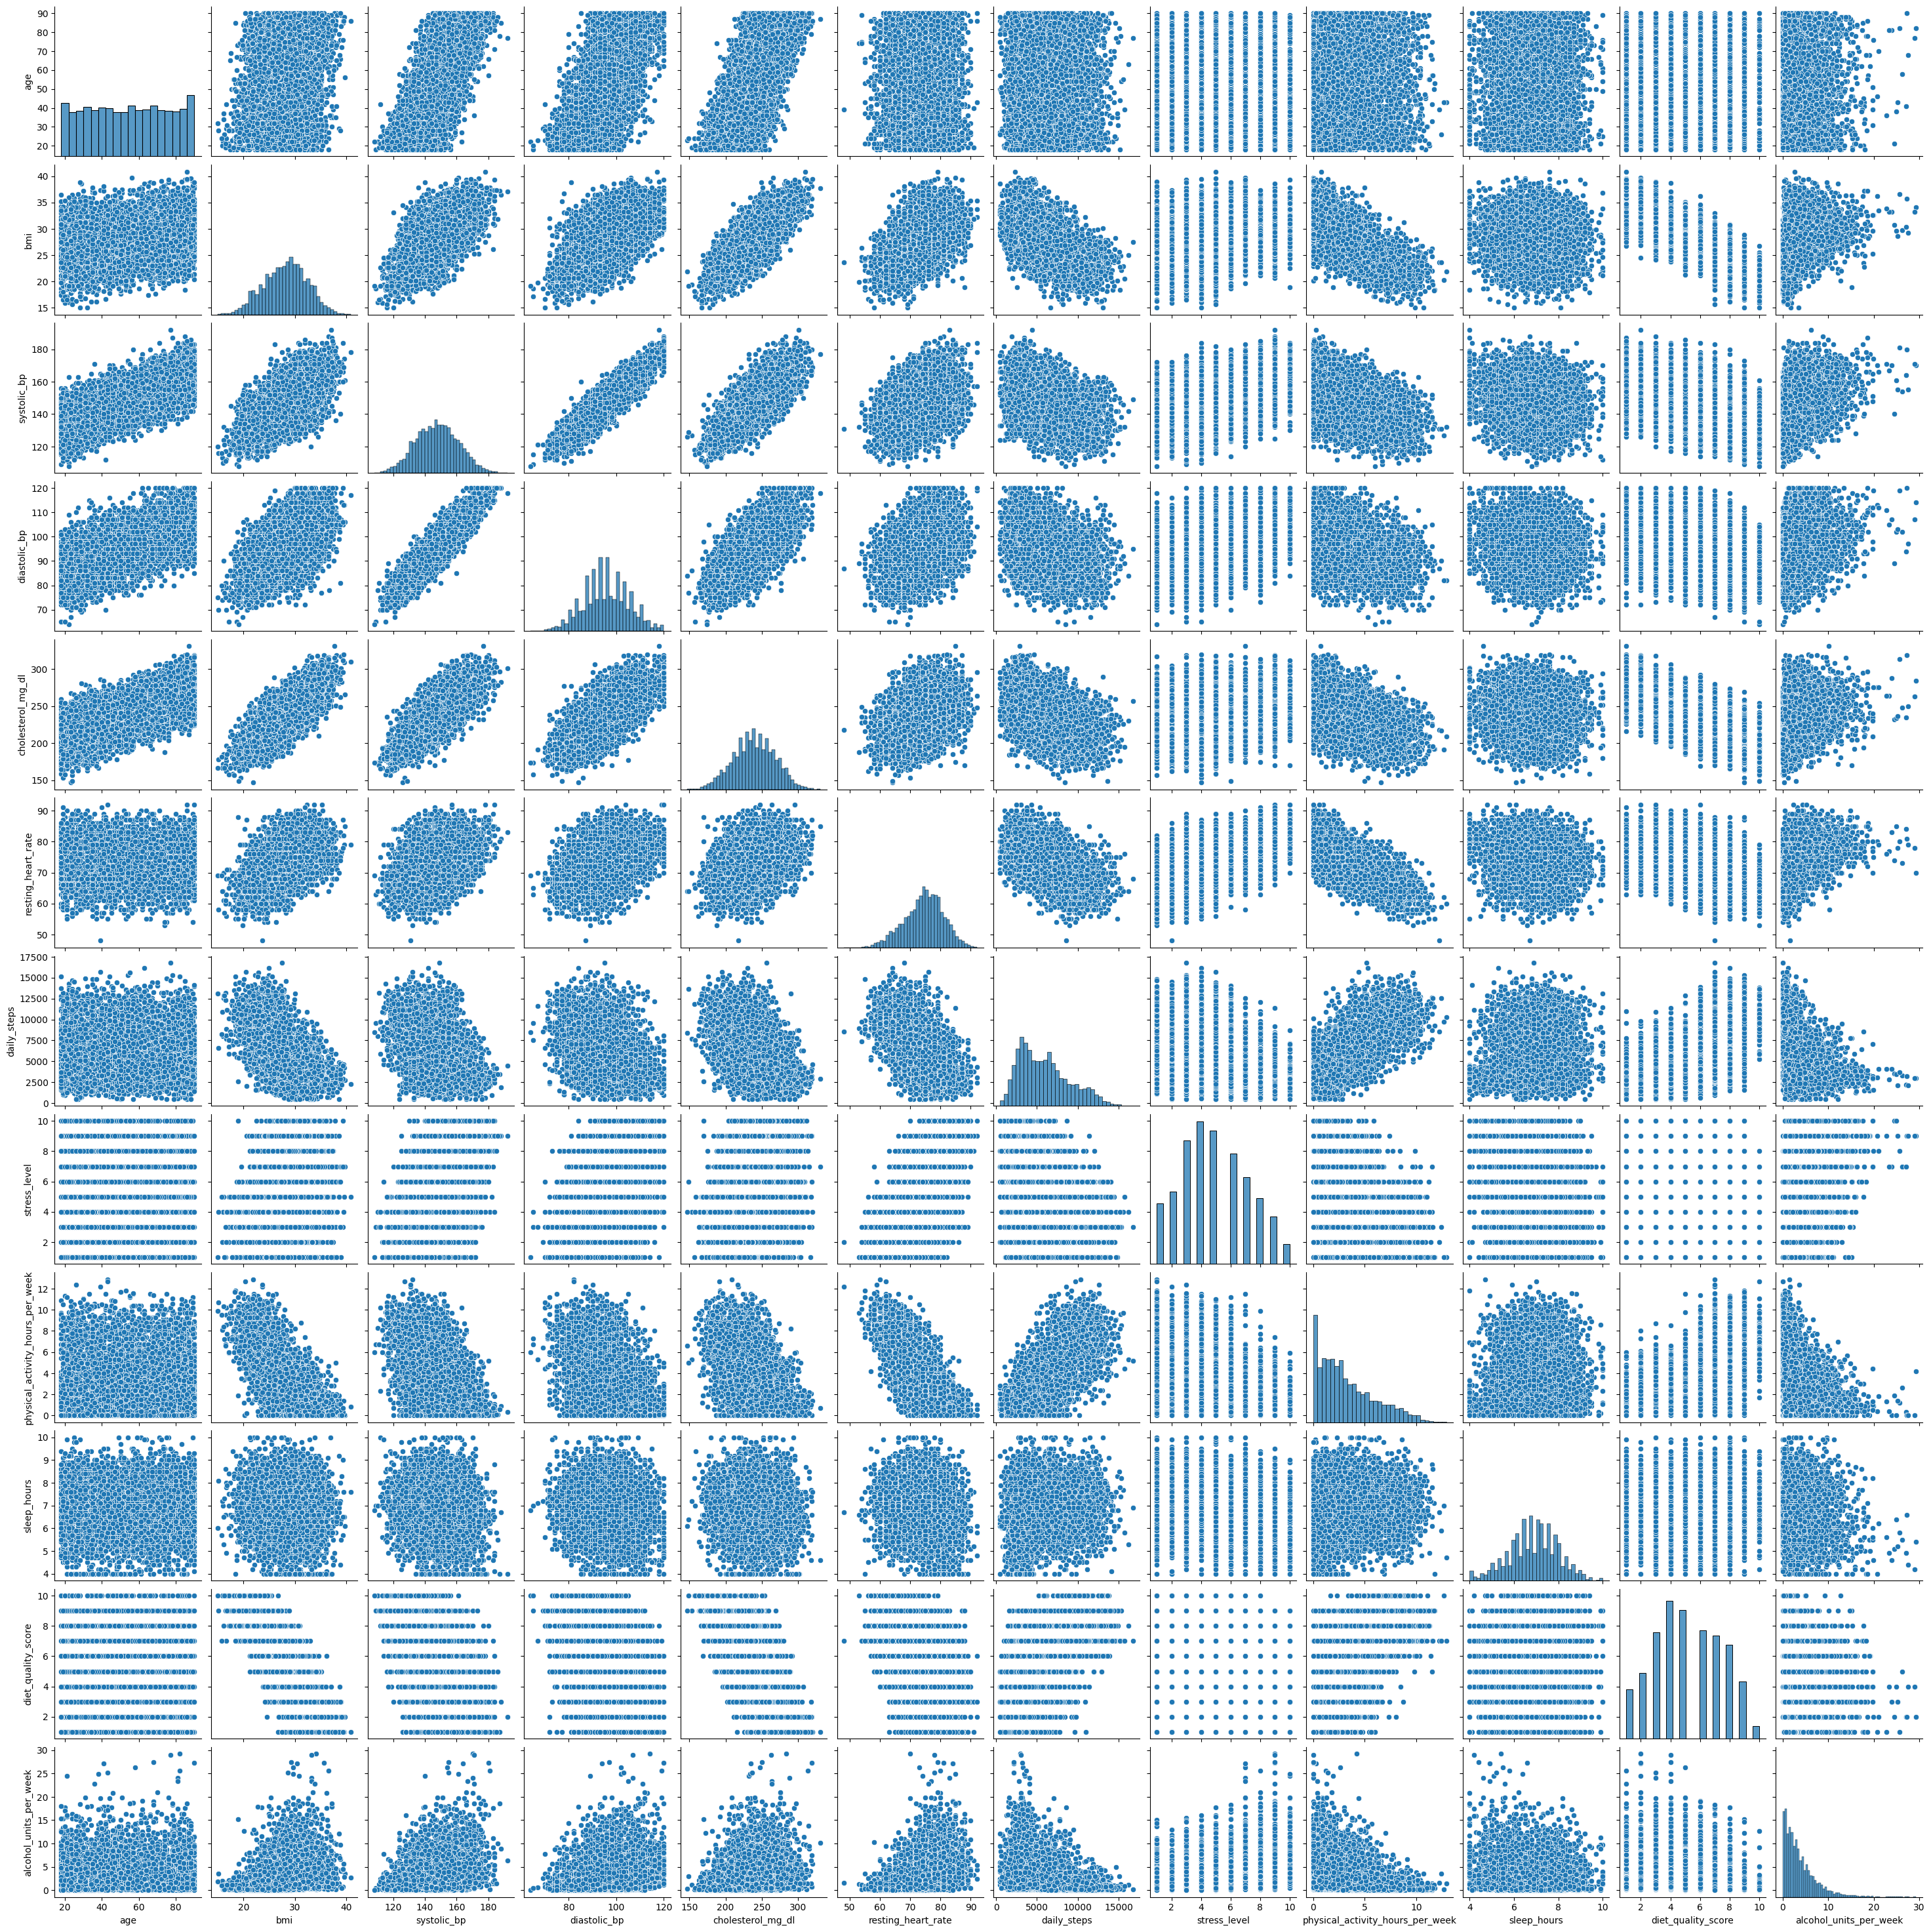

In [18]:
# pairplot entre las variables
sns.pairplot(cardiovascular_risk_df)
plt.show()

Un pairplot es una herramienta de visualización que permite explorar las relaciones entre las variables de un dataset. En este caso se puede observar como algunas variables, como `systolic_bp` y `diastolic_bp` parecen tener una relación lineal, mientras que otras como `age` y `sleep_hours` no muestran una relación tan clara. 

Con este tipo de observaciones se pueden identificar variables que sean linealmente separables o no, lo que puede ser útil para la construcción de modelos de clasificación.

### 2\. Preprocesamiento de Datos (10%)

1.  Separa las características (`X`) de la etiqueta (`Y`). La columna `risk_category` es la etiqueta.
3.  Divide el dataset en conjuntos de entrenamiento y prueba utilizando `train_test_split` de `sklearn`. **Asegúrate de usar `random_state=42` para garantizar la reproducibilidad de los resultados.**

In [19]:
# separar características y etiquetas
X = cardiovascular_risk_df.drop(columns=["risk_category"])
y = cardiovascular_risk_df["risk_category"]

# dividir en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### 3\. Exploración efecto del kernel (20%)

1. Utilice la función `plot_frontier_svc` definidia abajo para graficar la frontera de decisión entre las clases usando solo las columnas `['systolic_bp', 'age']`. Utilice **`LabelEncoder`** para codificar `Y`. Haga la gráfica para todos los kernels disponibles en sklearn.
2. Compare los resultados usando `C = [0.1, 1, 10, 1000]` y `kernel=rbf`. 
3. Responda las siguientes preguntas

- ¿Usando `rbf` que observa sucede a medida que se incrementa `C` con la frontera de decisión?

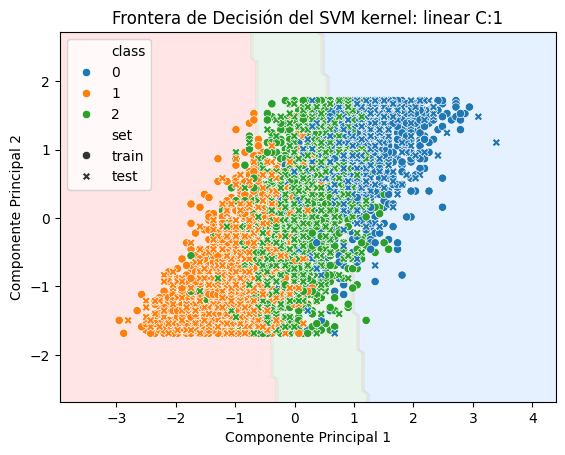

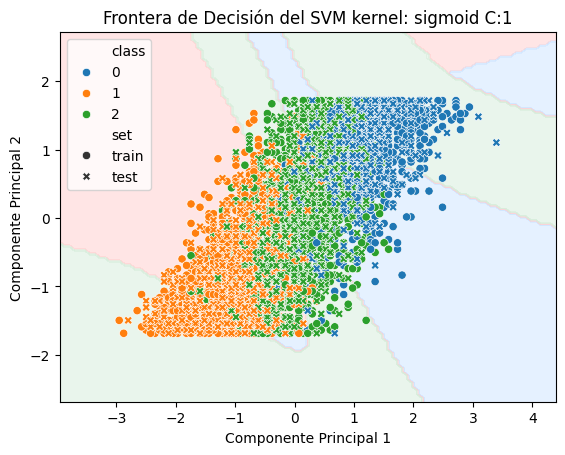

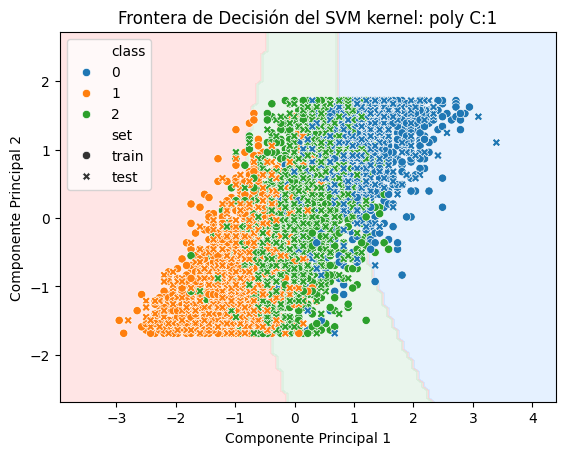

In [23]:
# separamos las columnas de interés para la visualización
X_vis = X_train[["systolic_bp", "age"]]

# codificar las etiquetas de clase para la visualización
label_encoder = LabelEncoder()
y_vis = label_encoder.fit_transform(y_train)

# kernels por probar
kernels = ["linear", "sigmoid", "poly", "rbf"]

for kernel in kernels:
    plot_frontier_svc(X_vis.values, y_vis, kernel=kernel, C=1) # dejamos por defecto C=1

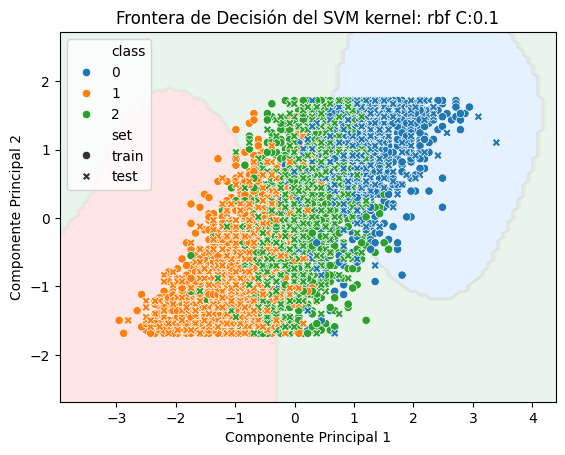

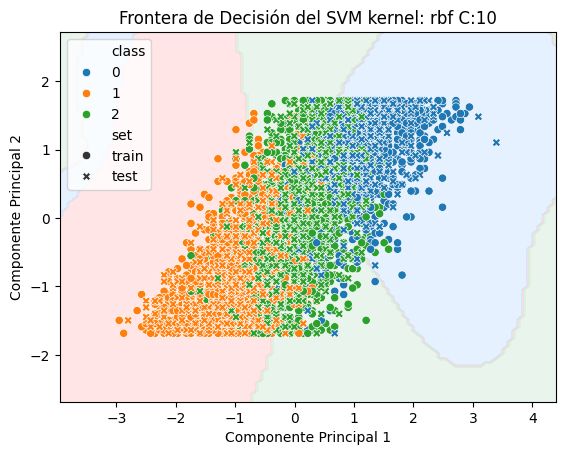

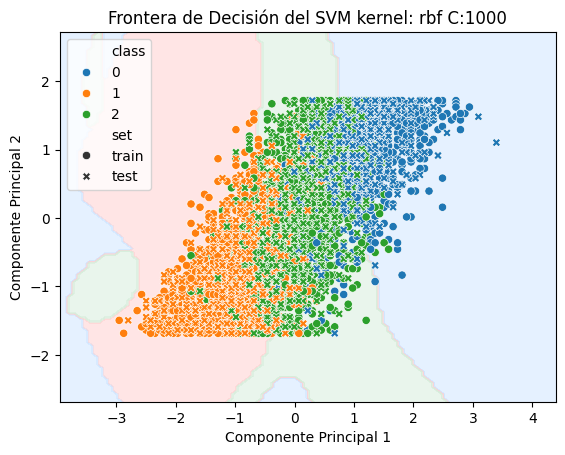

In [24]:
# cambiar el valor de C para el kernel rbf
C_values = [0.1, 1, 10, 1000]

for C in C_values:
    plot_frontier_svc(X_vis.values, y_vis, kernel="rbf", C=C)

En primer lugar, es importante recordar que el hiperparámetro `C` en SVM controla el equilibro entre maximizar el margen de separación y minimizar el error de clasificación. Un valor bajo de `C` permite un margen más amplio, lo que puede resultar en una frontera de decisión más suave y generalizada, mientras que un valor alto de `C` penaliza más los errores de clasificación, lo que puede llevar a una frontera de decisión más ajustada a los datos de entrenamiento.

Usando el kernel `rbf`, a medida que se incrementa el valor de `C`, se puede observar como la frontera de decisión se vuelve más compleja y ajustada a los datos de entrenamiento, penalizando de sobremanera los errores de clasificación. Se puede además observar como los márgenes de separación se vuelven más estrechos, especialmente en la clase 1 (roja), donde los datos a la extrema izquierda abajo se ven al borde de una frontera muy ajustada.

En contraste, con valores más bajos de `C`, la frontera de decisión tiene mayor margen de separación, lo que puede resultar en una mejor capacidad de generalización a nuevos datos, aunque también puede llevar a un mayor número de errores de clasificación en el conjunto de entrenamiento.

### 4\. Entrenamiento y Evaluación (30%)

1. Construye un pipeline en `sklearn` que incluya los siguientes componentes: **`StandardScaler`**, **`OneHotEncoder`** y **`SVC`**. Utilice la clase `Pipeline` de sklearn y utilice el kernel `poly` con C=`1.0`
2. Entrena el modelo con el dataset de entrenamiento
3. Producir el reporte completo de clasificación y la matriz de confusión.

Classification Report:
              precision    recall  f1-score   support

        High       0.97      0.90      0.93       288
         Low       0.96      0.88      0.92       348
      Medium       0.86      0.95      0.90       464

    accuracy                           0.91      1100
   macro avg       0.93      0.91      0.92      1100
weighted avg       0.92      0.91      0.91      1100

Accuracy Score: 0.9145454545454546
F1 Score: 0.9149619531700124
Recall Score: 0.9145454545454546


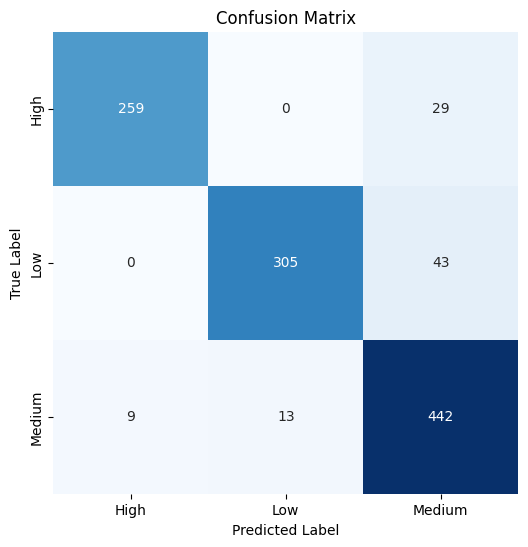

In [34]:
# definimos las columnas numéricas y categóricas
numeric_cols = X.select_dtypes(include=['number']).columns
categorical_cols = X.select_dtypes(include=['object']).columns

# preprocesamiento de los datos
preprocessor = ColumnTransformer(
    transformers=[
        ('scaler', StandardScaler(), numeric_cols),
        ('onehot', OneHotEncoder(), categorical_cols)]
)

# creamos el pipeline
pipeline = Pipeline([
    ('preprocessing', preprocessor),
    ('svc', SVC(kernel='poly', C=1.0))
])

# entrenamos el modelo con el pipeline definido
pipeline.fit(X_train, y_train)

# prediccion en test
y_pred = pipeline.predict(X_test)

# metricas
print("Classification Report:")
print(classification_report(y_test, y_pred))

print("Accuracy Score:", accuracy_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred, average='weighted'))
print("Recall Score:", recall_score(y_test, y_pred, average='weighted'))

# grafica de la matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cbar=False, cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

### 5\. Optimizacion de parametros (30%)

1. Construye un pipeline en `sklearn` que incluya los siguientes componentes: **`StandardScaler`**, **`OneHotEncoder`** y **`SVC`**. Utilice la clase `Pipeline` de sklearn
2. Entrena el modelo con el dataset de entrenamiento usando GridSearchCV pruebe todos los kernels disponibles en sklearn y utilice `C = [0.1, 1, 10, 100]`
3. Responsa las siguientes preguntas

- ¿Cuales hiperparámetros arrojaron el mejor modelo?

Fitting 5 folds for each of 16 candidates, totalling 80 fits
Mejores hiperparámetros encontrados: {'svc__C': 1, 'svc__kernel': 'linear'}
Classification Report con mejores hiperparámetros:
              precision    recall  f1-score   support

        High       0.95      0.95      0.95       288
         Low       0.96      0.95      0.95       348
      Medium       0.93      0.94      0.93       464

    accuracy                           0.94      1100
   macro avg       0.94      0.94      0.94      1100
weighted avg       0.94      0.94      0.94      1100



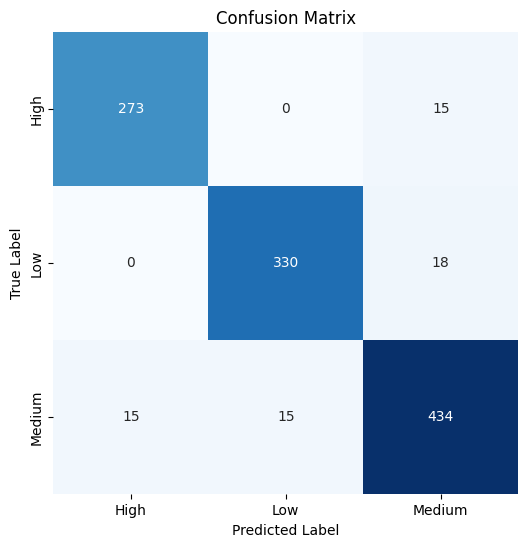

In [38]:
# reciclamos el código de preprocesamiento
numeric_cols = X.select_dtypes(include=['number']).columns
categorical_cols = X.select_dtypes(include=['object']).columns

preprocessor = ColumnTransformer(
    transformers=[
        ('scaler', StandardScaler(), numeric_cols),
        ('onehot', OneHotEncoder(), categorical_cols)]
)

# creamos el pipeline
pipeline = Pipeline([
    ('preprocessing', preprocessor),
    ('svc', SVC(kernel='poly', C=1.0)) #NOTA: al correr grid search los valores por defecto se sobreescriben
])

# definimos la grilla de hiperparámetros
param_grid = {
    'svc__kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
    'svc__C': [0.1, 1, 10, 100]
}

grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='accuracy', verbose=1, n_jobs=-1)

# entrenamos el modelo con la búsqueda de hiperparámetros
grid_search.fit(X_train, y_train)
print("Mejores hiperparámetros encontrados:", grid_search.best_params_)

# evaluamos el modelo con los mejores hiperparámetros
best_model = grid_search.best_estimator_
y_pred_best = best_model.predict(X_test) # predicción

print("Classification Report con mejores hiperparámetros:")
print(classification_report(y_test, y_pred_best))

# matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred_best)

plt.figure(figsize=(6, 6))
sns.heatmap(conf_matrix, annot=True, cbar=False, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

Los hiperparámetros que arrojan el mejor modelo al optimizar la métrica de accuracy con GridSearchCV son `kernel='linear'` y `C=1`. Previamente se hizo una visualización de la frontera de decisión con esta configuración y se observó que en su mayoría, este modelo logra separar las clases de manera efectiva. Es interesante señalar que la clase high nunca es clasificada como low, y los elementos de la clase low nunca se clasifican como high, lo que sugiere que la clase más problemática es medium, además de ser la que más datos tiene.